# Principal Components

In [160]:
import numpy as np
import matplotlib.pyplot as plt

In [169]:
X1 = 1.5*np.random.randn(10000, 1)
X2 = 0.5*np.random.randn(10000, 1)

In [170]:
X = np.c_[X1, X2]

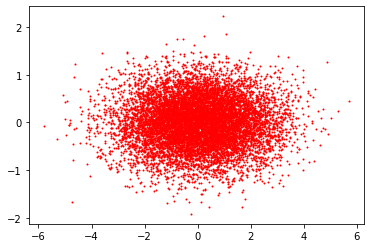

In [171]:
plt.plot(X1, X2, "r.", markersize=2)

In [245]:
y = np.sqrt(np.square(X1) + np.square(X2)) + 0.2*np.random.randn(10000, 1)

In [150]:
theta = np.radians(45)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, s), (-s, c)))

In [151]:
R

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

In [152]:
Y = np.ones((200, 2))

In [153]:
Y.dot(R)[:10]

array([[1.11022302e-16, 1.41421356e+00],
       [1.11022302e-16, 1.41421356e+00],
       [1.11022302e-16, 1.41421356e+00],
       [1.11022302e-16, 1.41421356e+00],
       [1.11022302e-16, 1.41421356e+00],
       [1.11022302e-16, 1.41421356e+00],
       [1.11022302e-16, 1.41421356e+00],
       [1.11022302e-16, 1.41421356e+00],
       [1.11022302e-16, 1.41421356e+00],
       [1.11022302e-16, 1.41421356e+00]])

In [172]:
X_rot = X.dot(R)

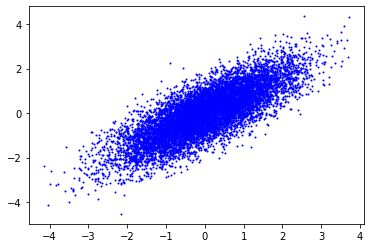

In [173]:
plt.plot(X_rot[:, 0], X_rot[:, 1], "b.", markersize=2)

In [174]:
U, s, Vt = np.linalg.svd(X_rot)

In [175]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

# Projecting Down to d Dimensions

In [176]:
W2 = Vt.T[:, :2]

In [185]:
R.dot(W2)

array([[-0.99999763, -0.00217776],
       [-0.00217776,  0.99999763]])

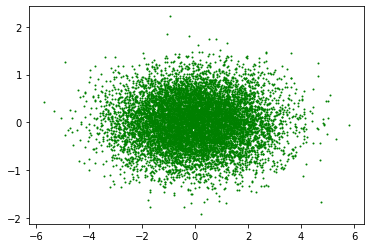

In [178]:
plt.plot(X2D[:, 0], X2D[:, 1], "g.", markersize=2)a

# Using Scikit-Learn

In [181]:
from sklearn.decomposition import PCA

In [182]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X_rot)

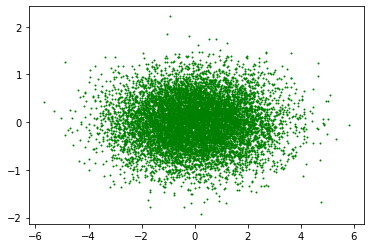

In [183]:
plt.plot(X2D[:, 0], X2D[:, 1], "g.", markersize=2)

# Explained Variance Ratio

In [184]:
pca.explained_variance_ratio_

array([0.89768083, 0.10231917])

# Choosing the Right Number of Dimensions

In [194]:
pca = PCA()
pca.fit(X_rot)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [211]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_rot)

In [216]:
X_reduced[:10]

array([[-0.23305882, -0.82501008],
       [ 0.91099326, -0.09706226],
       [ 1.47328117,  0.22888235],
       [ 1.30255429,  0.13973456],
       [ 0.86473992,  0.50395414],
       [-0.97000883,  0.18352371],
       [ 1.8742913 ,  0.05144219],
       [ 0.5260433 ,  0.32318929],
       [-1.59018665, -1.04244652],
       [ 0.21204163,  0.27943685]])

In [215]:
X[:10]

array([[ 0.24656457, -0.82054555],
       [-0.89905308, -0.09506407],
       [-1.46204187,  0.22966844],
       [-1.29112333,  0.14088866],
       [-0.85409462,  0.50605059],
       [ 0.98134018,  0.18957351],
       [-1.86266881,  0.0513648 ],
       [-0.51500936,  0.32601581],
       [ 1.60415768, -1.03505782],
       [-0.20091416,  0.28293993]])

# PCA for Compression

In [223]:
pca = PCA(n_components = 2)
X_reduced = pca.fit_transform(X)
X_recovered = pca.inverse_transform(X_reduced)

In [225]:
X_recovered[:10]

array([[ 0.24656457, -0.82054555],
       [-0.89905308, -0.09506407],
       [-1.46204187,  0.22966844],
       [-1.29112333,  0.14088866],
       [-0.85409462,  0.50605059],
       [ 0.98134018,  0.18957351],
       [-1.86266881,  0.0513648 ],
       [-0.51500936,  0.32601581],
       [ 1.60415768, -1.03505782],
       [-0.20091416,  0.28293993]])

# Randomized PCA

In [226]:
rnd_pca = PCA(n_components=2, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X)

# Incremental PCA

In [228]:
from sklearn.decomposition import IncrementalPCA

In [233]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
    
X_reduced = inc_pca.transform(X)

NameError: name 'X_train' is not defined

In [232]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))
batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

NameError: name 'filename' is not defined

# Kernel PCA

In [234]:
from sklearn.decomposition import KernelPCA

In [235]:
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

# Selecting a Kernel and Tuning Hyperparameters

In [251]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [244]:
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

/home/sejin8642/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/sejin8642/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/sejin8642/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sejin8642/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/sejin8642/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1345, in fit
    check_class

ValueError: Unknown label type: 'continuous'

In [246]:
print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}


In [247]:
rbf_pca = KernelPCA(
    n_components = 2,
    kernel="rbf",
    gamma=0.0433,
    fit_inverse_transform=True)

X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [248]:
X_preimage[:10]

array([[ 0.24656457, -0.82054555],
       [-0.89905308, -0.09506407],
       [-1.46204187,  0.22966844],
       [-1.29112333,  0.14088866],
       [-0.85409462,  0.50605059],
       [ 0.98134018,  0.18957351],
       [-1.86266881,  0.0513648 ],
       [-0.51500936,  0.32601581],
       [ 1.60415768, -1.03505782],
       [-0.20091416,  0.28293993]])

In [249]:
X[:10]

array([[ 0.24656457, -0.82054555],
       [-0.89905308, -0.09506407],
       [-1.46204187,  0.22966844],
       [-1.29112333,  0.14088866],
       [-0.85409462,  0.50605059],
       [ 0.98134018,  0.18957351],
       [-1.86266881,  0.0513648 ],
       [-0.51500936,  0.32601581],
       [ 1.60415768, -1.03505782],
       [-0.20091416,  0.28293993]])

In [252]:
mean_squared_error(X, X_preimage)

6.644987235226645e-28

# LLE

In [253]:
from sklearn.manifold import LocallyLinearEmbedding

In [254]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

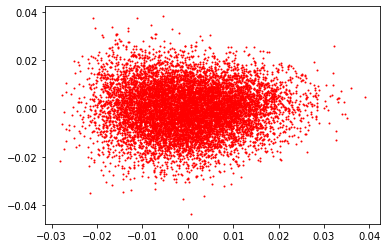

In [256]:
plt.plot(X_reduced[:, 0], X_reduced[:, 1], "r.", markersize=2)